In [43]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics

sns.set()
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
plt.rcParams["figure.figsize"] = (8,5)

In [27]:

def precision_stats(model, y, X):
    pred_y = model.predict(X)
    coefficients = model.coef_
    intercept = model.intercept_
    MSE = metrics.mean_squared_error(y,pred_y)
    # these 3 are all the saem
    score = model.score(X,y)
    explained_var = metrics.explained_variance_score(y, pred_y)
    R2 = metrics.r2_score(y, pred_y)
    # residuals
    res = y - pred_y 
    print("Residuals info", res.describe())
    
    print("coefficients:", coefficients)
    print("intercept", intercept)
    
    print("MSE", MSE)
    print("explained variance", explained_var)

In [6]:
Boston = pd.read_csv("../../datasets/Boston.csv")
Boston.head()

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2

In [28]:
# 

Residuals info count    5.060000e+02
mean    -4.437382e-15
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
Name: medv, dtype: float64
coefficients: [-0.95004935]
intercept 34.5538408793831
MSE 38.48296722989415
explained variance 0.5441462975864798


In [65]:
results = smf.ols('medv ~ lstat', data=Boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           5.08e-88
Time:                        09:39:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [66]:
results.conf_int()

0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951

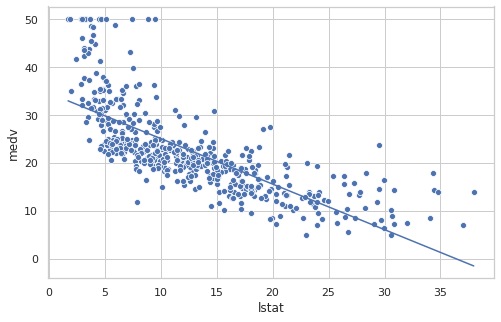

In [69]:
residu = results.predict(Boston["lstat"]) - Boston["medv"]
sns.scatterplot("lstat" ,"medv",data=Boston)
sns.lineplot(Boston["lstat"], results.predict(Boston["lstat"]))

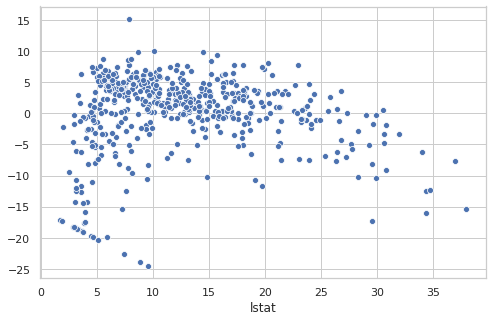

In [74]:
sns.scatterplot(residu, Boston["lstat"])
# sns.lineplot(Boston["lstat"], 0)
